In [1]:
%matplotlib inline
import tellurium as te
import numpy as np
import lmfit   # Fitting lib
import math
import random 
import matplotlib.pyplot as plt
import model_fitting as mf

In [2]:
# A model to analyzie
model = """
     A -> B; k1*A
     B -> C; k2*B
     C -> D; k3*C
      
     A = 5;
     B = 0;
     C = 0;
     D = 0;
     k1 = 0.1
     k2 = 0.2
     k3 = 0.3
"""
parameters = mf.makeParameters(constants=['k1', 'k2', 'k3'])

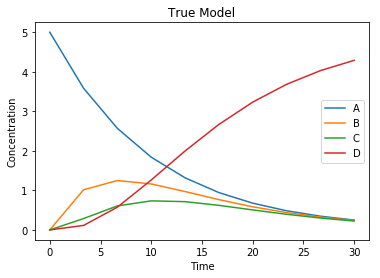

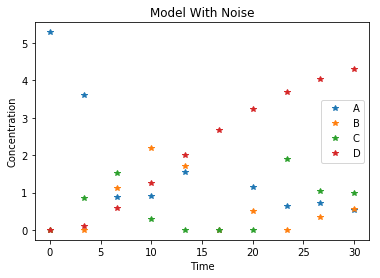

In [3]:
pure_data = mf.runSimulation(model=model)
obs_data = mf.makeObservations(model=model, noise_std=1.0)
columns = ['A', 'B', 'C', 'D']
mf.plotTimeSeries(pure_data, title="True Model", columns=columns)
mf.plotTimeSeries(obs_data, title="Model With Noise", is_scatter=True, columns=columns)

In [4]:
np.shape(obs_data)

(10, 5)

In [5]:
parameters = mf.fit(obs_data, model=model, parameters=parameters)
parameters

name,value,standard error,relative error,initial value,min,max,vary
k1,0.11979694,0.01534191,(12.81%),1,0.00000000,10.0000000,True
k2,0.17476198,0.03439096,(19.68%),1,0.00000000,10.0000000,True
k3,0.26367932,0.07738880,(29.35%),1,0.00000000,10.0000000,True


In [6]:
mf.crossValidate(obs_data, model=model, parameters=parameters, num_folds=5)

([Parameters([('k1',
               <Parameter 'k1', value=0.11859464906910144 +/- 0.0168, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.16451508692555294 +/- 0.0357, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.24003393773948944 +/- 0.0772, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.14463314356291224 +/- 0.0229, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.15360918964684722 +/- 0.0288, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.2284605810081597 +/- 0.0632, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.10466225044156008 +/- 0.0125, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.1567852761966687 +/- 0.0284, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.4831824800669854 +/- 0.242, bounds=[0:10]>)]),
  Parameters([('k1',
     